We begin by finding the roots symbolically, using `sympy`. First, on a simple case $f(x)=x^2-1,$ then on $f(x)=x^3-3x+1.$

In [1]:
from sympy.solvers import solve, solveset
from sympy import Symbol, var
x = Symbol('x')
solve(x**2 -1,x)

[-1, 1]

In [2]:
x = var('x',real=True)
solveset(x**3-3*x+1,x)

{-sqrt(3)*sin(pi/9)/2 - 3*re(1/((-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3))) + cos(pi/9)/2 + I*(-3*im(1/((-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3))) + sin(pi/9)/2 + sqrt(3)*cos(pi/9)/2), sqrt(3)*sin(pi/9)/2 + cos(pi/9)/2 - 3*re(1/((-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3))) + I*(-sqrt(3)*cos(pi/9)/2 + sin(pi/9)/2 - 3*im(1/((-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)))), -2*cos(pi/9)}

Note that the imaginary terms are roundoff errors, and can be ignored since $f(x)$ has real roots. Let us examine its graph.

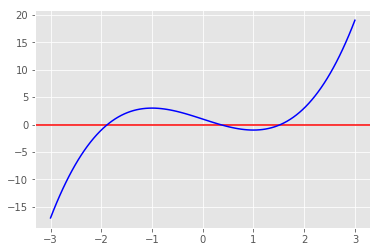

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def f(x):
    return x**3-3*x+1
x = np.linspace(-3,3,100)
plt.axhline(0, c='red')
plt.plot(x, f(x),'blue')
plt.show()

We check the symbolic roots.

In [4]:
import numpy as np
f(-2*np.cos(np.pi/9))

-8.881784197001252e-16

In [5]:
f(-np.sqrt(3)*np.sin(np.pi/9) + np.cos(np.pi/9))

-4.440892098500626e-16

We will use the following methods to find the three roots:

- Brent's method 
- secant method
- Newton's method
- fixed-point iteration

Note that for Newton's method,  we can optionally supply the exact derivative of $f.$

In [6]:
from scipy.optimize import brentq, newton
brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1,3)

(-1.8793852415718166, 0.3472963553337031, 1.532088886237956)

In [7]:
newton(f, -3), newton(f, 0), newton(f, 3)

(-1.8793852415718166, 0.34729635533385395, 1.5320888862379578)

In [8]:
fprime = lambda x: 3*x**2 - 3
newton(f, -3, fprime), newton(f, 0, fprime), newton(f, 3, fprime)

(-1.8793852415718166, 0.34729635533386066, 1.532088886237956)

To use a fixed-point iteration, we must reformulate the problem $f(x)=0$ as $g(x)=x.$ We obtain $$\frac{x^3}{3} + \frac{1}{3} =x.$$

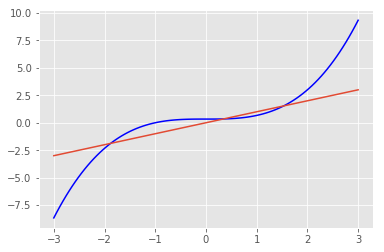

In [9]:
def g(x):
    return (x**3)/3+1/3
x = np.linspace(-3,3,100)
plt.plot(x, g(x), color='blue')
plt.plot(x, x)
plt.show()

In [10]:
from scipy.optimize import fixed_point
fixed_point(g, 0), fixed_point(g, -3), fixed_point(g, 3)

(array(0.34729636), array(-1.87938524), array(1.53208889))